<a href="https://colab.research.google.com/github/comojin1994/VGG/blob/master/Evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd ./drive/My\ Drive/Deep_learning/Paper_implementation/VGG
!ls

/content/drive/My Drive/Deep_learning/Paper_implementation/VGG
Evaluate.ipynb	ngrok			      __pycache__     VGG16
model.py	ngrok-stable-linux-amd64.zip  Training.ipynb  VGG19


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import os, math
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
from model import VGG16, VGG19
%matplotlib inline
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

### Hyperparameter

In [0]:
EPOCHS = 100
batch_size = 32
input_shape = (batch_size, 32, 32 ,3)
num_classes = 10
learning_rate = 0.001
initial_epoch = 0

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']

### Load Data

In [5]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()
train_x.shape, train_y.shape, test_x.shape, test_y.shape

170500096/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    dtype=tf.float32
)
validation_datagen = ImageDataGenerator(
    rescale=1./255.,
    dtype=tf.float32
)

train_generator = train_datagen.flow(train_x, train_y, batch_size=batch_size)
validation_generator = validation_datagen.flow(train_x, train_y, batch_size=batch_size)

# **VGG16**

In [0]:
model = VGG16()
model.compile(optimizer=optimizer, loss=loss_object, metrics=metrics)

In [0]:
model.load_weights('checkpoints/')

### Evaluation

In [0]:
model.evaluate(validation_generator)

1563/1563 [==============================] - 37s 24ms/step - loss: 0.4983 - accuracy: 0.8338


[0.49825147813470866, 0.83378]

### Prediction

In [0]:
pred = model.predict(tf.cast(test_x[:10], dtype=tf.float32))
pred = tf.argmax(pred, axis=1)
print(pred)
print(test_y[:10])

tf.Tensor([1 9 5 9 6 6 1 5 6 1], shape=(10,), dtype=int64)
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


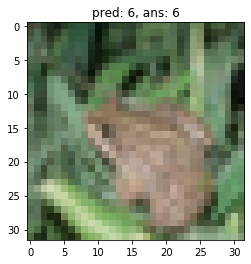

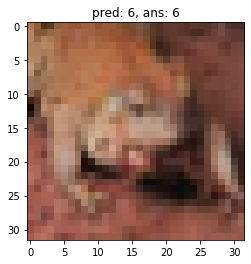

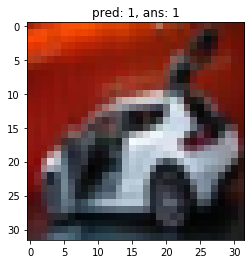

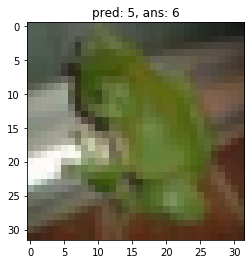

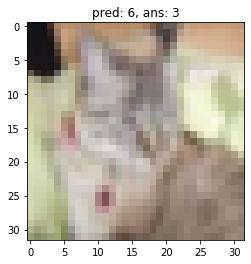

In [0]:
for i in range(5):
  plt.title('pred: %d, ans: %d' % (pred.numpy()[4+i], test_y[4+i][0]))
  plt.imshow(test_x[4+i])
  plt.show()

# **VGG19**

In [0]:
model = VGG19()
model.compile(optimizer=optimizer, loss=loss_object, metrics=metrics)

In [8]:
model.load_weights('VGG19/checkpoints/')

### Evaluation

In [9]:
model.evaluate(validation_generator)

1563/1563 [==============================] - 44s 28ms/step - loss: 0.6291 - accuracy: 0.7851


[0.6291484668021468, 0.78514]

### Prediction

In [19]:
pred = model.predict(tf.cast(test_x[:10], dtype=tf.float32))
pred = tf.argmax(pred, axis=1)
print(pred)
print(test_y[:10])

tf.Tensor([9 9 9 9 9 9 9 9 9 9], shape=(10,), dtype=int64)
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


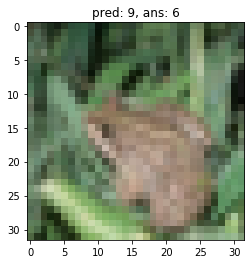

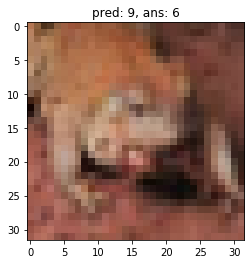

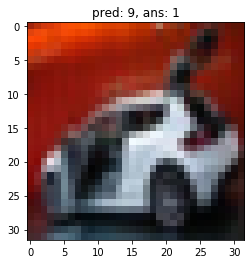

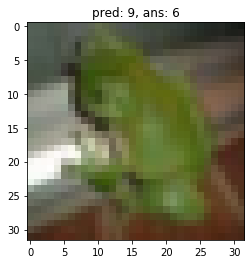

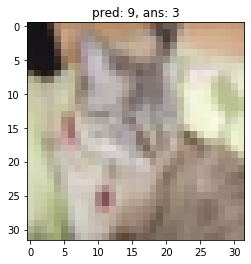

In [20]:
for i in range(5):
  plt.title('pred: %d, ans: %d' % (pred.numpy()[4+i], test_y[4+i][0]))
  plt.imshow(test_x[4+i])
  plt.show()